In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, D_in, D_H, D_out):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(D_in, D_H)
        self.relu = nn.ReLU()
        # self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(D_H, D_out)
    def forward(self, x):
        out = self.fc1(x.view(-1, 28 * 28))  # resize
        out = self.relu(out)
        out = self.fc2(out)
        # lin = self.dropout(lin)
        # lin = self.linear2(lin)
        return out

In [4]:
mnist_data = MNIST('~/tmp/mnist', train=True, transform=transforms.ToTensor())
train_iter = DataLoader(mnist_data,
                        batch_size=64,
                        shuffle=False)
test_data = MNIST('~/tmp/mnist', train=False, transform=transforms.ToTensor())
valid_iter = DataLoader(test_data,
                        batch_size=64,
                        shuffle=False)

In [26]:
input_dim = 28 * 28
hidden_dim = 50
n_classes = 10
learning_rate = 0.001

model = MLP(input_dim, hidden_dim, n_classes)
model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

N_EPOCHS = 20
loss_all = []
val_loss_all = []
val_acc_all = []
# Each epoch has a training and validation phase
for epoch in range(N_EPOCHS):
    running_loss = 0
    # Iterate over data.
    for i, (images, labels) in enumerate(train_iter):
        # get the inputs
        images = Variable(images.cuda())
        labels = Variable(labels.cuda())
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.data[0]
        # backward + optimize only if in training phase
        loss.backward()
        optimizer.step()
    loss_all.append(running_loss / (i + 1))
    print ('Epoch [%d/%d], Loss: %.4f') % \
          (epoch + 1, N_EPOCHS, running_loss / (i + 1))
    running_loss = 0
    val_acc = 0
    for j, (images, labels) in enumerate(valid_iter):
        # get the inputs
        images = Variable(images, volatile=True).cuda()
        labels = Variable(labels, volatile=True).cuda()
        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.data[0]
        # prediction
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.data).sum()
        val_acc += float(correct) / labels.size(0)
    val_loss_all.append(running_loss / (j + 1))
    val_acc_all.append(val_acc / (j + 1))

Epoch [1/20], Loss: 2.2225


Epoch [2/20], Loss: 1.9999


Epoch [3/20], Loss: 1.7113


Epoch [4/20], Loss: 1.4133


Epoch [5/20], Loss: 1.1675


Epoch [6/20], Loss: 0.9893


Epoch [7/20], Loss: 0.8636


Epoch [8/20], Loss: 0.7730


Epoch [9/20], Loss: 0.7051


Epoch [10/20], Loss: 0.6526


Epoch [11/20], Loss: 0.6109


Epoch [12/20], Loss: 0.5769


Epoch [13/20], Loss: 0.5488


Epoch [14/20], Loss: 0.5252


Epoch [15/20], Loss: 0.5051


Epoch [16/20], Loss: 0.4879


Epoch [17/20], Loss: 0.4729


Epoch [18/20], Loss: 0.4597


Epoch [19/20], Loss: 0.4482


Epoch [20/20], Loss: 0.4379


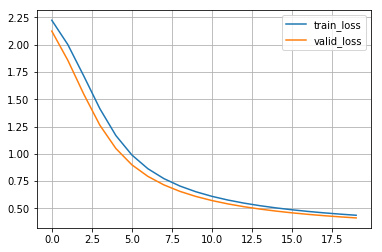

In [27]:
plt.plot(range(N_EPOCHS), loss_all, label='train_loss')
plt.plot(range(N_EPOCHS), val_loss_all, label='valid_loss')
plt.legend()
plt.grid()
plt.show()

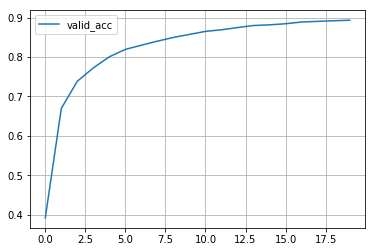

In [29]:
plt.plot(range(N_EPOCHS), val_acc_all, label='valid_acc')
plt.legend()
plt.grid()
plt.show()